In [168]:
# standard python imports
import numpy as np
import matplotlib.pylab as plt

# tidy3D import
import tidy3d as td
from tidy3d.constants import C_0
from tidy3d.plugins.mode import ModeSolver

### Waveguide dimensions and signal wavelenght

In [169]:
# waveguide information
wg_width = 0.45
wg_height = 0.22
si = td.material_library['cSi']['Palik_Lossless']
sio2 = td.material_library['SiO2']['Palik_Lossless']

In [170]:
# central frequency
wvl_um = 1.55
freq0 = C_0 / wvl_um
fwidth = freq0 / 3

In [171]:
num_freqs = 11
f0_ind = num_freqs // 2
wvl_ums = np.linspace(1.5,1.6,num_freqs)
freqs = C_0 / wvl_ums

### Using Mode Solver

In [172]:
# size of simulation domain
Lx, Ly, Lz = 1, 6, 1
dl = 0.05

# run_time in ps
run_time = 1e-12

# automatic grid specification
grid_spec = td.GridSpec.auto(min_steps_per_wvl=40, wavelength=wvl_um)

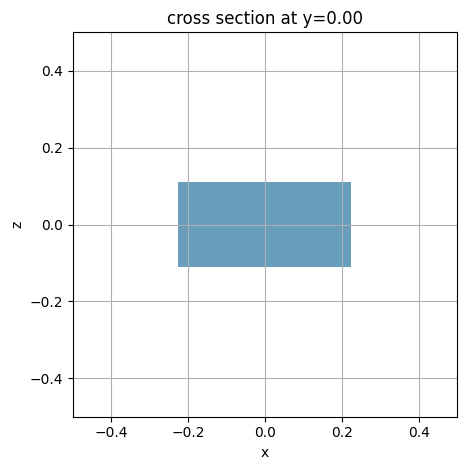

In [173]:
waveguide = td.Structure(
    geometry=td.Box(size=(wg_width, td.inf, wg_height)),
    medium=si,
)

sim = td.Simulation(
    size=(Lx, Ly, Lz),
    grid_spec=grid_spec,
    structures=[waveguide],
    run_time=run_time,
    boundary_spec=td.BoundarySpec.all_sides(boundary=td.Periodic()),
    medium=sio2,
)

ax = sim.plot(y=0)
plt.grid()
plt.show()

In [174]:
plane = td.Box(center=(0, 0, 0), size=(4, 0, 3.5))

In [175]:
mode_spec = td.ModeSpec(
    num_modes=3,
    target_neff=2.0,
    group_index_step=True,
)

In [176]:
mode_solver = ModeSolver(
    simulation=sim,
    plane=plane,
    mode_spec=mode_spec,
    freqs=freqs,
)
mode_data = mode_solver.solve()

11:58:43 -03 WARNING: Mode field at frequency index 0, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 1, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 2, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 3, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 4, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 5, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 6, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 7, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 8, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 9, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 10, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 11, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 12, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 13, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 14, mode index 2 does not   
             decay at the plane boundaries.                                     

11:58:44 -03 WARNING: Mode field at frequency index 15, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 16, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 17, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 18, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 19, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 20, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 21, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 22, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 23, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 24, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 25, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 26, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 27, mode index 1 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 27, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 28, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 29, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 30, mode index 1 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 30, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 31, mode index 1 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 31, mode index 2 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 32, mode index 1 does not   
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 32, mode index 2 does not   
             decay at the plane boundaries.                                     

In [177]:
mode_data.to_dataframe()

wavelength     n eff  k eff  TE (Ex) fraction  \
f            mode_index                                                  
1.998616e+14 0                 1.50  2.376080    0.0          0.978715   
             1                 1.50  1.739701    0.0          0.050582   
             2                 1.50  1.477530    0.0          0.665604   
1.985381e+14 0                 1.51  2.363531    0.0          0.978045   
             1                 1.51  1.726734    0.0          0.050304   
             2                 1.51  1.472138    0.0          0.661479   
1.972319e+14 0                 1.52  2.350976    0.0          0.977362   
             1                 1.52  1.714106    0.0          0.050003   
             2                 1.52  1.466888    0.0          0.657521   
1.959428e+14 0                 1.53  2.338423    0.0          0.976668   
             1                 1.53  1.701830    0.0          0.049679   
             2                 1.53  1.461789    0.0          0.653692   
1.946704e+14 0                 1.54  2.325870    0.0          0.975963   
             1                 1.54  1.689886    0.0          0.049336   
             2                 1.54  1.456803    0.0          0.649980   
1.934145e+14 0                 1.55  2.313321    0.0          0.975246   
             1                 1.55  1.678265    0.0          0.048978   
             2                 1.55  1.451940    0.0          0.646431   
1.921747e+14 0                 1.56  2.300743    0.0          0.974517   
             1                 1.56  1.666946    0.0          0.048604   
             2                 1.56  1.447182    0.0          0.642986   
1.909506e+14 0                 1.57  2.288208    0.0          0.973780   
             1                 1.57  1.655958    0.0          0.048220   
             2                 1.57  1.442531    0.0          0.639674   
1.897421e+14 0                 1.58  2.275654    0.0          0.973033   
             1                 1.58  1.645252    0.0          0.047826   
             2                 1.58  1.437961    0.0          0.636447   
1.885487e+14 0                 1.59  2.263041    0.0          0.972273   
             1                 1.59  1.634780    0.0          0.047424   
             2                 1.59  1.433447    0.0          0.633364   
1.873703e+14 0                 1.60  2.250495    0.0          0.971507   
             1                 1.60  1.624640    0.0          0.047016   
             2                 1.60  1.429035    0.0          0.630347   

                         wg TE fraction  wg TM fraction  mode area  \
f            mode_index                                              
1.998616e+14 0                 0.743885        0.815289   0.182291   
             1                 0.719167        0.855221   0.304154   
             2                 0.894080        0.967793   0.508941   
1.985381e+14 0                 0.741824        0.814576   0.185452   
             1                 0.725783        0.852754   0.309560   
             2                 0.896192        0.969014   0.516169   
1.972319e+14 0                 0.739835        0.813865   0.188673   
             1                 0.732392        0.850239   0.315004   
             2                 0.898054        0.970173   0.523150   
1.959428e+14 0                 0.737923        0.813153   0.191955   
             1                 0.738995        0.847674   0.320486   
             2                 0.899686        0.971279   0.529924   
1.946704e+14 0                 0.736087        0.812443   0.195297   
             1                 0.745567        0.845058   0.325988   
             2                 0.901101        0.972336   0.536492   
1.934145e+14 0                 0.734336        0.811731   0.198699   
             1                 0.752086        0.842398   0.331500   
             2                 0.902319        0.973336   0.542830   
1.921747e+14 0                 0.7

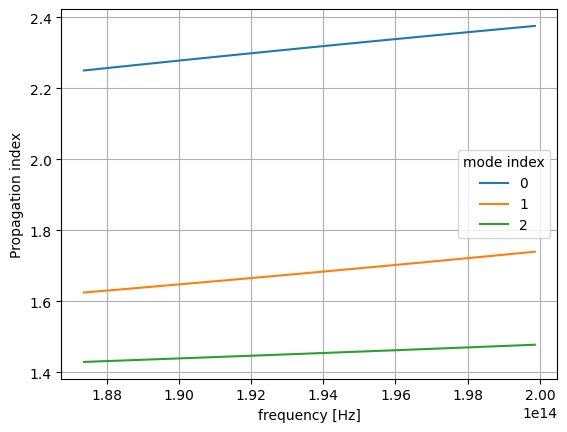

In [178]:
fig, ax = plt.subplots(1)
n_eff = mode_data.n_eff  # real part of the effective mode index
n_eff.plot.line(x='f')
plt.grid()
plt.show()

In [179]:
# Mode data
print(f"Effective indices: {mode_data.n_eff.values[f0_ind]}")
print(f"Effective mode areas (µm²): {mode_data.mode_area.values[f0_ind]}")
print(f"Group index: {mode_data.n_group.values[f0_ind]}")

Effective indices: [2.3133214 1.6782646 1.4519402]
Effective mode areas (µm²): [0.19869896 0.33150017 0.54282965]
Group index: [4.261177  3.4570937 2.1985478]


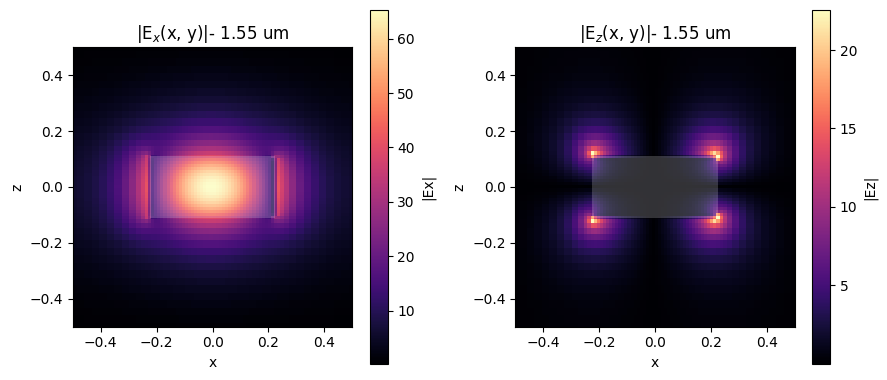

In [180]:
mode_index = 0
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(9, 4))
mode_solver.plot_field("Ex", "abs", mode_index=mode_index, f=freq0, ax=ax1, robust=False)
mode_solver.plot_field("Ez", "abs", mode_index=mode_index, f=freq0, ax=ax2, robust=False)

ax1.set_title(r"|E$_x$(x, y)|- %0.2f um" %(C_0/freq0))
ax1.set_xlim([-0.5,0.5])
ax1.set_ylim([-0.5,0.5])
ax1.set_aspect("equal")
ax2.set_title(r"|E$_z$(x, y)|- %0.2f um" %(C_0/freq0))
ax2.set_xlim([-0.5,0.5])
ax2.set_ylim([-0.5,0.5])
ax2.set_aspect("equal")
plt.show()

## Using waveguide plugin

In [181]:
from tidy3d.plugins import waveguide

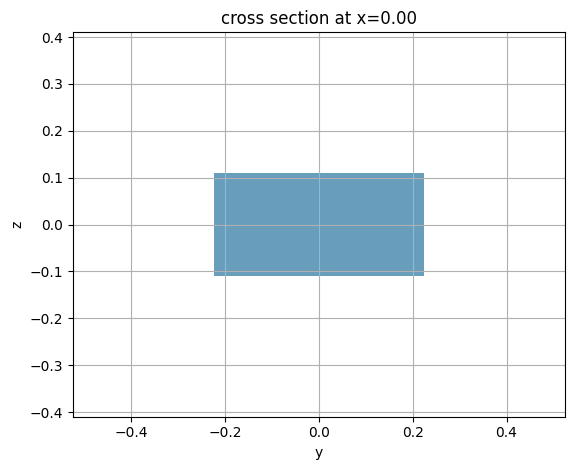

In [182]:
strip = waveguide.RectangularDielectric(
    wavelength=wvl_um,
    core_width=wg_width,
    core_thickness=wg_height,
    core_medium=si,
    clad_medium=sio2,
    box_medium=sio2,
    origin=(0,0,-wg_height/2),
    mode_spec=td.ModeSpec(num_modes=2, group_index_step=True),
)

# Take a look at the waveguide cross-section
_ = strip.plot_structures(x=0)
plt.grid()

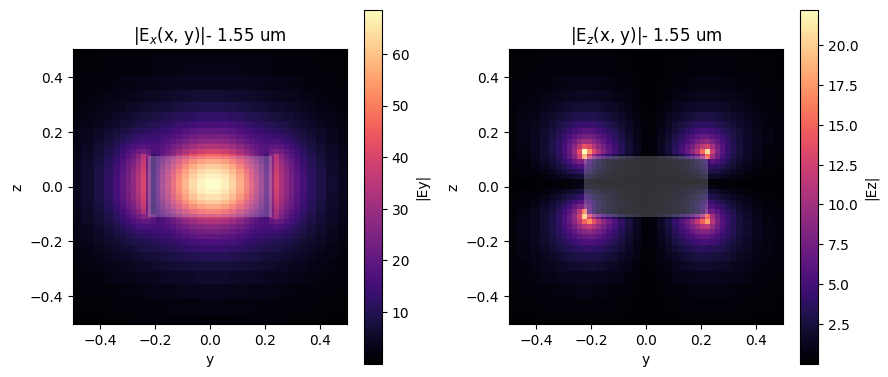

In [183]:
mode_index = 0
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(9, 4))
strip.plot_field("Ey",val='abs',mode_index=mode_index,ax=ax1,robust=False)
strip.plot_field("Ez",val='abs',mode_index=mode_index,ax=ax2,robust=False)

ax1.set_title(r"|E$_x$(x, y)|- %0.2f um" %(C_0/freq0))
ax1.set_xlim([-0.5,0.5])
ax1.set_ylim([-0.5,0.5])
ax1.set_aspect("equal")
ax2.set_title(r"|E$_z$(x, y)|- %0.2f um" %(C_0/freq0))
ax2.set_xlim([-0.5,0.5])
ax2.set_ylim([-0.5,0.5])
ax2.set_aspect("equal")
plt.show()

In [184]:
# Mode data
print(f"Effective indices: {strip.n_eff.values}")
print(f"Effective mode areas (µm²): {strip.mode_area.values}")
print(f"Group index: {strip.n_group.values}")

Effective indices: [[2.3597722 1.739034 ]]
Effective mode areas (µm²): [[0.19679208 0.35585869]]
Group index: [[4.287124  3.6391706]]
